In [87]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#loading the data
aqi_data = pd.read_csv(r'C:\Users\btn9n\Downloads\air+quality\AirQualityUCI.csv', sep=';' , decimal=',')


In [3]:
aqi_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
#aqi_data

In [5]:
#removing last 2 columns
aqi_data=aqi_data.iloc[:,:-2]
aqi_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
#adding lagged RH column (need for residual)
aqi_data['RH_lag1']=aqi_data['RH'].shift(1)

In [7]:
aqi_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#locating 9356 row--> hint taken from dataset website
aqi_data.loc[[9356]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,13.5


In [9]:
aqi_data.loc[[9357]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1


In [10]:
aqi_data.shape

(9471, 16)

In [11]:
#so the values after 9356 are NaN, remove them
aqi_data= aqi_data.dropna()


In [12]:
aqi_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36.3
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,29.3
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,23.7
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,18.3
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,13.5


In [13]:
aqi_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,48.9
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,47.7
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,54.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,60.0
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,59.6


In [14]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9356 entries, 1 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9356 non-null   object 
 1   Time           9356 non-null   object 
 2   CO(GT)         9356 non-null   float64
 3   PT08.S1(CO)    9356 non-null   float64
 4   NMHC(GT)       9356 non-null   float64
 5   C6H6(GT)       9356 non-null   float64
 6   PT08.S2(NMHC)  9356 non-null   float64
 7   NOx(GT)        9356 non-null   float64
 8   PT08.S3(NOx)   9356 non-null   float64
 9   NO2(GT)        9356 non-null   float64
 10  PT08.S4(NO2)   9356 non-null   float64
 11  PT08.S5(O3)    9356 non-null   float64
 12  T              9356 non-null   float64
 13  RH             9356 non-null   float64
 14  AH             9356 non-null   float64
 15  RH_lag1        9356 non-null   float64
dtypes: float64(14), object(2)
memory usage: 1.2+ MB


In [15]:
aqi_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
RH_lag1          0
dtype: int64

In [16]:
#no missing values. missing values are changed to -200 in actual dataset. so we need to change this -200 into NaN. described in UCI repository
#counting the number of times -200 appears in data
aqi_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
RH_lag1           366
dtype: int64

In [17]:
#convert all -200 to NaN
aqi_data=aqi_data.replace(to_replace=-200, value=np.nan)

In [18]:
aqi_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,48.9
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,47.7
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,54.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,60.0
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,36.3
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,29.3
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,23.7
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,18.3


In [19]:
aqi_data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
RH_lag1           366
dtype: int64

In [20]:
#getting mean. If -200 was not converted enen that values would have been included in mean calculation. hence we converted
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9356 entries, 1 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9356 non-null   object 
 1   Time           9356 non-null   object 
 2   CO(GT)         7673 non-null   float64
 3   PT08.S1(CO)    8990 non-null   float64
 4   NMHC(GT)       913 non-null    float64
 5   C6H6(GT)       8990 non-null   float64
 6   PT08.S2(NMHC)  8990 non-null   float64
 7   NOx(GT)        7717 non-null   float64
 8   PT08.S3(NOx)   8990 non-null   float64
 9   NO2(GT)        7714 non-null   float64
 10  PT08.S4(NO2)   8990 non-null   float64
 11  PT08.S5(O3)    8990 non-null   float64
 12  T              8990 non-null   float64
 13  RH             8990 non-null   float64
 14  AH             8990 non-null   float64
 15  RH_lag1        8990 non-null   float64
dtypes: float64(14), object(2)
memory usage: 1.2+ MB


In [21]:
aqi_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
count,7673.000000,8990.000000,913.000000,8990.000000,8990.000000,7717.000000,8990.000000,7714.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000
mean,2.152691,1099.804227,218.887185,10.082903,939.141491,246.907218,835.469077,113.091263,1456.238376,1022.878865,18.318354,49.234238,1.025560,49.238220
std,1.453338,217.074766,204.559281,7.450209,266.843890,212.990978,256.821073,48.373243,346.217121,398.498066,8.832467,17.317855,0.403825,17.313661
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,9.200000
25%,1.100000,937.000000,67.000000,4.400000,734.250000,98.000000,658.000000,78.000000,1227.000000,731.250000,11.800000,35.800000,0.736750,35.800000
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995500,49.600000
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.000000,142.000000,1673.750000,1273.750000,24.400000,62.500000,1.313750,62.500000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,88.700000


In [22]:
aqi_data.select_dtypes(include='number').mean()


CO(GT)              2.152691
PT08.S1(CO)      1099.804227
NMHC(GT)          218.887185
C6H6(GT)           10.082903
PT08.S2(NMHC)     939.141491
NOx(GT)           246.907218
PT08.S3(NOx)      835.469077
NO2(GT)           113.091263
PT08.S4(NO2)     1456.238376
PT08.S5(O3)      1022.878865
T                  18.318354
RH                 49.234238
AH                  1.025560
RH_lag1            49.238220
dtype: float64

In [23]:
aqi_data=aqi_data.fillna(aqi_data.select_dtypes(include='number').mean())

In [24]:
aqi_data.head(25)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,RH_lag1
1,10/03/2004,19.00.00,2.000000,1292.0,112.0,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255,48.9
2,10/03/2004,20.00.00,2.200000,1402.0,88.0,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502,47.7
3,10/03/2004,21.00.00,2.200000,1376.0,80.0,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867,54.0
4,10/03/2004,22.00.00,1.600000,1272.0,51.0,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888,60.0
5,10/03/2004,23.00.00,1.200000,1197.0,38.0,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848,59.6
6,11/03/2004,00.00.00,1.200000,1185.0,31.0,3.6,690.0,62.000000,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603,59.2
7,11/03/2004,01.00.00,1.000000,1136.0,31.0,3.3,672.0,62.000000,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702,56.8
8,11/03/2004,02.00.00,0.900000,1094.0,24.0,2.3,609.0,45.000000,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648,60.0
9,11/03/2004,03.00.00,0.600000,1010.0,19.0,1.7,561.0,246.907218,1705.0,113.091263,1235.0,501.0,10.3,60.2,0.7517,59.7
10,11/03/2004,04.00.00,2.152691,1011.0,14.0,1.3,527.0,21.000000,1818.0,34.000000,1197.0,445.0,10.1,60.5,0.7465,60.2


In [25]:
aqi_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
RH_lag1          0
dtype: int64

In [26]:
# forecasting with the fb prophet algorithm 
#convert date into year-month-date
date_info=pd.to_datetime(aqi_data['Date'], dayfirst=True)
print(date_info)

1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
5      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9356, dtype: datetime64[ns]


In [27]:
time_info=aqi_data['Time']

In [28]:
time_info=time_info.apply(lambda x: x.replace('.',':'))

In [29]:
time_info

1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
5       23:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9356, dtype: object

In [30]:
print(type(time_info), type(date_info))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [31]:
#combining both the series to dataframe
date_time=pd.concat([date_info,time_info],axis=1)

In [32]:
date_time

,Date,Time
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00
5,2004-03-10,23:00:00
...,...,...
9352,2005-04-04,10:00:00
9353,2005-04-04,11:00:00
9354,2005-04-04,12:00:00
9355,2005-04-04,13:00:00


In [33]:
#combining both to one column
date_time['ds']=date_time['Date'].astype(str)+' '+ date_time['Time'].astype(str)

In [34]:
date_time

,Date,Time,ds
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00
5,2004-03-10,23:00:00,2004-03-10 23:00:00
...,...,...,...
9352,2005-04-04,10:00:00,2005-04-04 10:00:00
9353,2005-04-04,11:00:00,2005-04-04 11:00:00
9354,2005-04-04,12:00:00,2005-04-04 12:00:00
9355,2005-04-04,13:00:00,2005-04-04 13:00:00


In [35]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9356 entries, 1 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9356 non-null   datetime64[ns]
 1   Time    9356 non-null   object        
 2   ds      9356 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 292.4+ KB


In [36]:
#convert ds back to datetime format from object data type
data=pd.DataFrame()

In [37]:
data['ds']=pd.to_datetime(date_time['ds']) #date and time column

In [38]:
data.head()

,ds
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00
5,2004-03-10 23:00:00


In [39]:
data['y']=aqi_data['RH'] #target variable

In [40]:
data['RH_lag1']=aqi_data['RH_lag1']
data['AH']=aqi_data['AH']

In [41]:
data

,ds,y,RH_lag1,AH
1,2004-03-10 19:00:00,47.7,48.9,0.7255
2,2004-03-10 20:00:00,54.0,47.7,0.7502
3,2004-03-10 21:00:00,60.0,54.0,0.7867
4,2004-03-10 22:00:00,59.6,60.0,0.7888
5,2004-03-10 23:00:00,59.2,59.6,0.7848
...,...,...,...,...
9352,2005-04-04 10:00:00,29.3,36.3,0.7568
9353,2005-04-04 11:00:00,23.7,29.3,0.7119
9354,2005-04-04 12:00:00,18.3,23.7,0.6406
9355,2005-04-04 13:00:00,13.5,18.3,0.5139


In [42]:
train=data.iloc[:-30]
test=data.iloc[-30:]

In [43]:
#training the model
model=Prophet()

In [44]:
model.fit(train)

12:16:16 - cmdstanpy - INFO - Chain [1] start processing
12:16:17 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
#making future prediction
#finding future ds values
future=model.make_future_dataframe(periods=len(test), freq='h')

In [46]:
future.tail()

,ds
9351,2005-04-04 10:00:00
9352,2005-04-04 11:00:00
9353,2005-04-04 12:00:00
9354,2005-04-04 13:00:00
9355,2005-04-04 14:00:00


In [47]:
#making predictions for these ds values
forecast=model.predict(future)

In [48]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9351,2005-04-04 10:00:00,44.267761,28.638236,60.915408
9352,2005-04-04 11:00:00,39.478999,24.005444,54.867115
9353,2005-04-04 12:00:00,36.441230,20.818122,51.561437
9354,2005-04-04 13:00:00,34.947269,18.774843,50.474574
9355,2005-04-04 14:00:00,34.261819,18.123449,49.623634


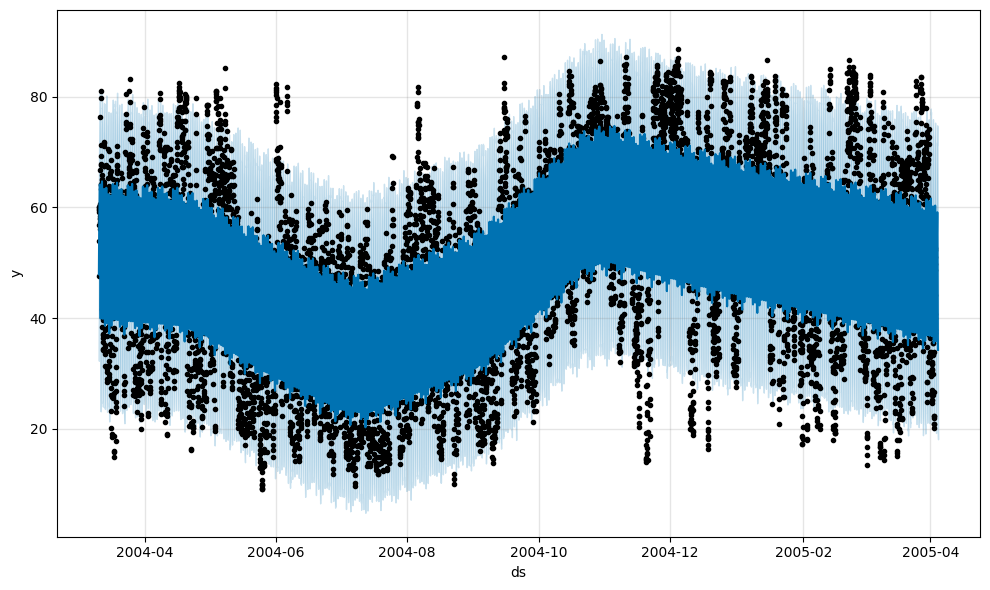

In [49]:
fig1=model.plot(forecast)

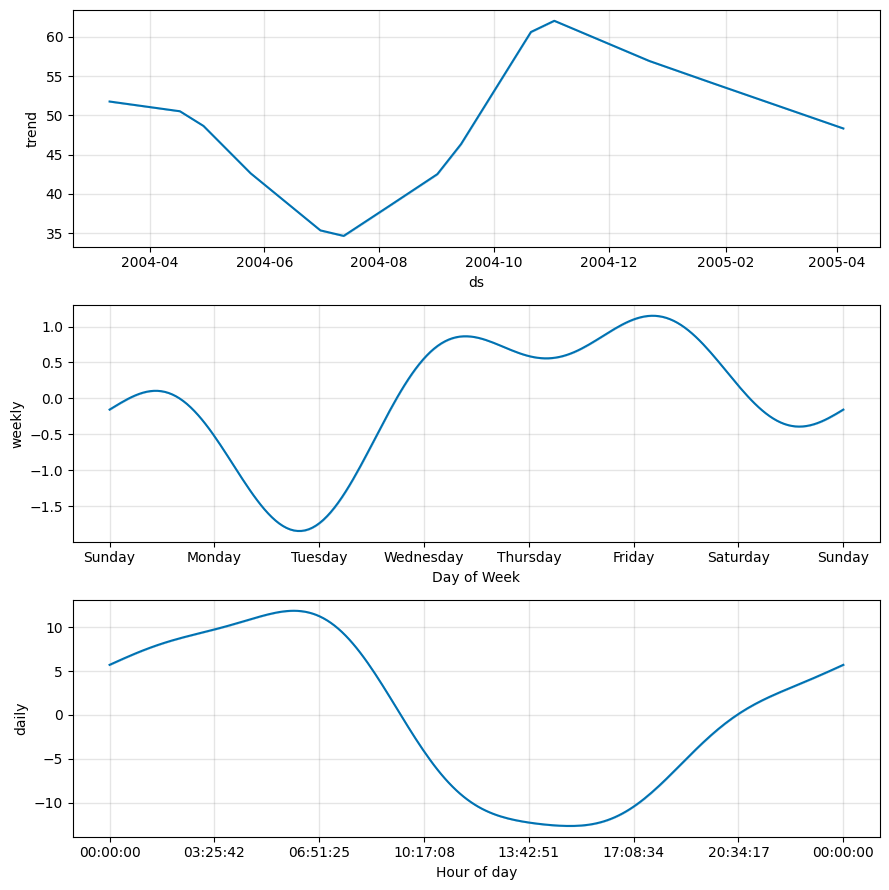

In [50]:
fig2=model.plot_components(forecast)

In [51]:
train_forecast=forecast.iloc[:-len(test)]['yhat'].values
test_forecast=forecast.iloc[-len(test):]['yhat'].values

In [52]:
print(train_forecast)

[47.93616933 51.09515341 53.4391122  ... 60.34774544 59.5059241
 56.47196172]


In [53]:
print(test_forecast)

[51.50282197 45.89000874 41.17808519 38.20420072 36.76009405 36.10954541
 35.82354816 36.14854039 37.61600849 40.34020799 43.72153855 46.83947851
 49.13502731 50.72647659 52.10249484 53.56193172 54.98224061 56.10142413
 56.92639038 57.7432713  58.65469588 59.13650772 58.17924388 55.03729957
 49.96915924 44.26776114 39.47899859 36.44123044 34.94726906 34.26181898]


In [54]:
train_forecast.shape

(9326,)

In [55]:
test_forecast.shape

(30,)

In [74]:
#finding residuals
train_residuals=train['y'].values-train_forecast

In [75]:
print(train_residuals)

[ -0.23616933   2.90484659   6.5608878  ...  -7.94774544  -6.8059241
 -16.47196172]


In [73]:
prophet_rmse = np.sqrt(mean_squared_error(test['y'], test_forecast))
print("Prophet-only RMSE:", prophet_rmse)

Prophet-only RMSE: 15.794526746007298


In [58]:
data

,ds,y,RH_lag1,AH
1,2004-03-10 19:00:00,47.7,48.9,0.7255
2,2004-03-10 20:00:00,54.0,47.7,0.7502
3,2004-03-10 21:00:00,60.0,54.0,0.7867
4,2004-03-10 22:00:00,59.6,60.0,0.7888
5,2004-03-10 23:00:00,59.2,59.6,0.7848
...,...,...,...,...
9352,2005-04-04 10:00:00,29.3,36.3,0.7568
9353,2005-04-04 11:00:00,23.7,29.3,0.7119
9354,2005-04-04 12:00:00,18.3,23.7,0.6406
9355,2005-04-04 13:00:00,13.5,18.3,0.5139


In [59]:
X_train=train[['RH_lag1','AH']]
X_test=test[['RH_lag1','AH']]

In [79]:
#decision tree
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train, train_residuals)
dt_pred_resid=dt.predict(X_test)

In [80]:
#over xgboost
xgb=XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, train_residuals)
xgb_pred_resid=xgb.predict(X_test)

In [81]:
#final predictions

final_pred_dt=test_forecast+dt_pred_resid

final_pred_xgb=test_forecast+xgb_pred_resid

In [82]:
#comparing performance using mean square error

print("DT RMSE:",np.sqrt(mean_squared_error(test['y'], final_pred_dt)))

print("XGB RMSE:",np.sqrt(mean_squared_error(test['y'], final_pred_xgb)))


DT RMSE: 6.363899368280523
XGB RMSE: 5.391415487728496


In [83]:
#xgboost reduced residual considerably

In [84]:
final_model=xgb

In [88]:
r2=r2_score(test['y'],final_pred_xgb)
print(f"R-squared: {r2:.4f}")

R-squared: 0.9130


In [89]:
#let us visualize the result 

In [90]:
import matplotlib.pyplot as plt

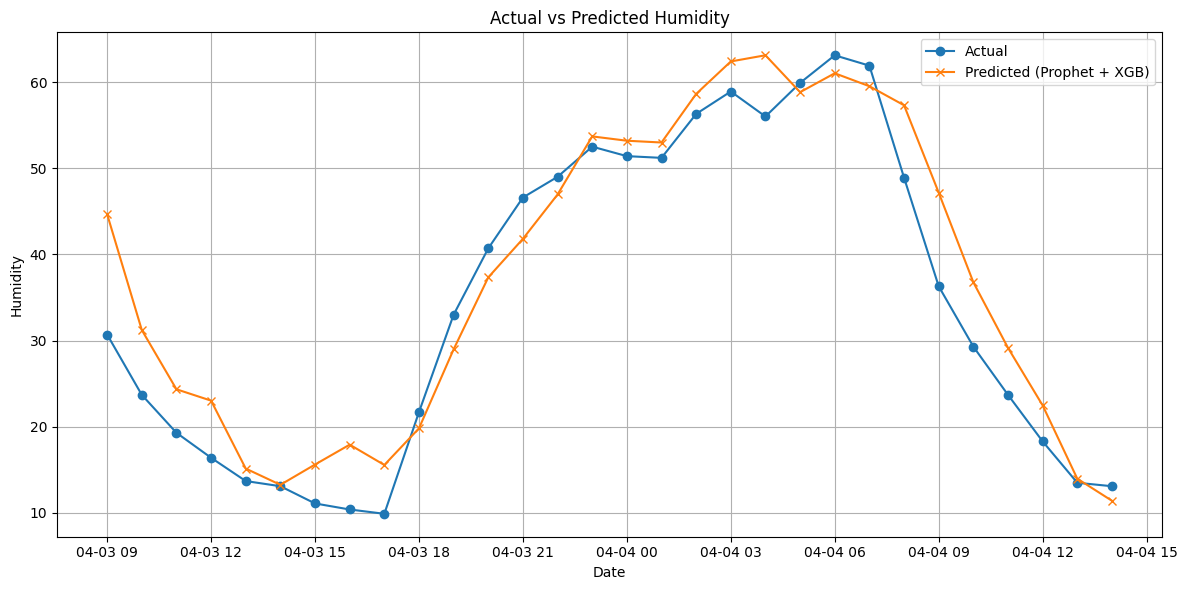

In [91]:
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual', marker='o')
plt.plot(test['ds'], final_pred_xgb, label='Predicted (Prophet + XGB)', marker='x')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Actual vs Predicted Humidity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
#now we need to store this model

In [93]:
import joblib

joblib.dump(model, 'prophet_model.pkl')

['prophet_model.pkl']

In [94]:
joblib.dump(final_model, 'xgb_residual_model.pkl')

['xgb_residual_model.pkl']

In [95]:
#creating a function for future predictions

In [96]:
def predict_prophet_xgb(data, prophet_model, xgb_model):
    # Prophet forecast
    forecast = prophet_model.predict(data[['ds']])
    yhat = forecast['yhat'].values
    
   
    X_feat = data[['RH_lag1', 'AH']]  
    
    # Predict residuals
    resid_pred = xgb_model.predict(X_feat)
    
    # Combine
    final_pred = yhat + resid_pred
    return final_pred

In [97]:
#the input here will be the final polished data dataframe